# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Gabriel Mesquita de Souza

#### RA

11057015

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [6]:
from sklearn import datasets
digits_dataset = datasets.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [175]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [197]:
digits_img.shape

(1797, 8, 8)

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [216]:
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [199]:
import matplotlib.pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

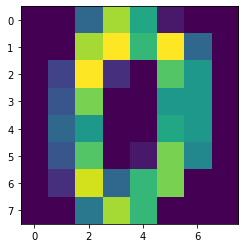

In [200]:
plt.imshow(digits_img[0])

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [201]:
import numpy as np

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [249]:
digits = np.reshape(digits_img, (1797, -1))

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [250]:
print(digits.shape)

(1797, 64)


Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [251]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [252]:
print(digits_target)

[0 1 2 ... 8 9 8]


Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [253]:
digits_target.shape

(1797,)

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [254]:
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [255]:
 X_train, X_test, y_train, y_test = train_test_split(
     digits, digits_target, test_size=0.25)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [256]:
X_train

array([[ 0.,  0.,  9., ..., 15.,  4.,  0.],
       [ 0.,  0.,  2., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  0., 10., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ...,  8.,  0.,  0.]])

In [257]:
X_test

array([[ 0.,  0.,  5., ..., 15.,  3.,  0.],
       [ 0.,  0., 12., ..., 12.,  1.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  2., 11., ..., 13., 16.,  1.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  6.,  0.,  0.]])

In [258]:
y_train

array([5, 3, 4, ..., 4, 2, 4])

In [259]:
y_test

array([0, 2, 4, 5, 1, 2, 1, 9, 3, 9, 1, 9, 3, 0, 9, 1, 5, 7, 9, 6, 8, 5,
       0, 3, 7, 6, 3, 5, 4, 9, 4, 3, 6, 1, 4, 3, 1, 5, 1, 4, 8, 1, 0, 3,
       1, 6, 9, 7, 5, 5, 6, 2, 3, 9, 5, 4, 7, 0, 0, 4, 5, 8, 0, 3, 1, 7,
       6, 1, 9, 9, 7, 8, 6, 5, 3, 9, 6, 0, 1, 3, 1, 7, 0, 5, 2, 6, 4, 0,
       2, 8, 2, 0, 8, 5, 1, 2, 9, 6, 2, 6, 5, 1, 7, 5, 1, 8, 5, 7, 6, 4,
       0, 5, 3, 8, 0, 7, 3, 2, 8, 2, 7, 9, 8, 7, 9, 6, 1, 9, 7, 6, 7, 1,
       0, 8, 3, 9, 9, 7, 2, 5, 6, 0, 6, 6, 1, 8, 4, 3, 4, 6, 4, 0, 9, 7,
       0, 0, 7, 0, 6, 4, 9, 6, 4, 1, 5, 2, 7, 6, 8, 0, 9, 2, 6, 0, 8, 9,
       3, 1, 8, 3, 9, 4, 0, 9, 9, 3, 2, 2, 8, 5, 3, 9, 0, 6, 5, 9, 7, 0,
       3, 3, 7, 3, 8, 2, 1, 6, 2, 5, 8, 0, 1, 5, 3, 6, 4, 2, 6, 6, 1, 3,
       4, 7, 3, 9, 8, 2, 6, 3, 7, 6, 7, 7, 1, 7, 1, 9, 2, 6, 7, 9, 9, 4,
       0, 7, 6, 6, 2, 7, 7, 6, 6, 0, 1, 4, 7, 5, 5, 6, 8, 7, 8, 7, 4, 9,
       3, 1, 8, 8, 8, 9, 4, 7, 6, 2, 5, 4, 8, 3, 0, 4, 1, 3, 6, 2, 6, 5,
       0, 5, 0, 3, 6, 7, 3, 2, 0, 9, 4, 4, 9, 1, 2,

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [260]:
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [261]:
knn = KNeighborsClassifier(n_neighbors=7)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [262]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [263]:
y_pred = knn.predict(X_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [264]:
from sklearn.metrics import accuracy_score, confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [265]:
accuracy_score(y_test, y_pred)

0.9844444444444445

Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [266]:
confusion_matrix(y_test, y_pred)

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  1, 49]])

### Decision Tree

#### Treinamento

In [268]:
from sklearn.tree import DecisionTreeClassifier

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [269]:
dt = DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [270]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [271]:
y_pred = dt.predict(X_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [272]:
accuracy_score(y_test, y_pred)

0.8377777777777777

Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [273]:
confusion_matrix(y_test, y_pred)

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  1,  2,  3,  0,  0,  0,  1,  1],
       [ 0,  1, 36,  0,  0,  1,  1,  1,  2,  0],
       [ 0,  0,  3, 45,  0,  1,  0,  2,  3,  0],
       [ 1,  2,  0,  1, 33,  0,  0,  2,  1,  0],
       [ 0,  1,  0,  0,  0, 38,  1,  1,  0,  1],
       [ 0,  0,  2,  0,  3,  0, 50,  0,  0,  0],
       [ 0,  3,  0,  6,  1,  0,  0, 39,  1,  0],
       [ 0,  3,  0,  3,  0,  1,  1,  0, 23,  1],
       [ 0,  3,  0,  3,  3,  3,  0,  2,  0, 38]])

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

Acurácia reflete ao parâmetro de medida da taxa de acertos do modelo de treinamento, tendo como parâmetro os dados de teste. A acurácia por si só não demonstra todas as informações referentes ao desempenho de um classificador, para adquirir mais detalhes da classificação a matriz de confusão nos proporciona o desempenho por cada registro de dado, sendo mais detalhado em relação ao desempenho de cada etiqueta, a precisão é uma métrica importante para avaliar os dados classificados como positivo pelo classificador, sendo mais indicado para minizarmos os números dos falsos positivos. A recall é um outro modelo para avaliar o desempenho que nos indica o quanto o modelo está identificando os casos positivos corretamente, muito útil para evitarmos falsos negativos. 

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

A matriz de confusão nos oferece uma visão sobre cada parâmetro que o classificador está identificando, a matriz pode ser muito útil para identificar os dados que o classificador está sendo mais impreciso do que outros.

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

Cada linha da matriz refere-se aos valores reais de uma classe, aqueles que consideramos como o padrão a ser acertado, em outras palavras é o nosso y_pred. As colunas referem-se aos valores identificados ou preditos pelo nosso classificador. A diagonal principal nos dá os valores acertados do nosso modelo para cada classe.

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Sim, pois a diagonal principal representam sempre os valores corretamentes indicados pelo modelo, qualquer número/parâmetro fora trata-se de uma predição incorreta.

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

Avaliaria o tamanho do dataset, bem como suas features e o computador disponível para uso. Caso haja um dataset com poucos dados, e um número pequeno de amostrar de uma determinada feature, escolher um número muito grande de vizinhos tende a diminuir a acurácia do modelo, assim como também um elevador valor de n tende a aumentar o custo de processamento, além da possibilidade de enviezar o classificador para os dados atuais. Por outro lado, um valor muito baixo de n irá aumenta a variância dos indicadores na maior parte dos casos. Uma boa técnica é avaliar por método gráfico um range de valores razoáveis, variando o número de n dentro desse range até obter o melhor resultado

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

Ambos classificadores são não paramétricos, pois são algoritmos que não fazem "pré suposições" sobre a função que modela o padrão, em outras palavras, são classificadores mais flexíveis em relação ao aprendizado de acordo com os dados disponibilizados, possuindo formas diferentes de acordo com o dataset ou seus parâmetros, no caso do KNN mudando seus vizinhos.

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

O KNN saiu-se melhor nessa prática, principalmente por sua especialização em reconhecer clusters, no nosso caso em que há um dataset de imagens de digitos onde os pixels se agrupam (formam clusters) de acordo com sua cor, o KNN tem uma maior facilidade em reconhecer esse padrão, já a árvore de decisões baseia-se na busca de relações entre os dados, sendo esse um parâmetro sem muita utilidade nesse dataset. O desempenho dos classificadores mudariam conforme as características do conjunto de dados e as predições desejadas. 
De um modo geral, a árvore de decisões sairia melhor para um grande conjunto de dados em que as relações entre as features e certas condições tenham grande importância na predição da classe, já o KNN seria uma melhor escolha para predições referentes a grupos em que a distância entre eles fosse determinante para sua predição.

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)